In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()
from statsmodels.api import qqplot
from statsmodels.formula.api import ols

## 1. Quantifying model fit

### 1.2. Coefficient of determination

The coefficient of determination is a measure of how well the linear regression line fits the observed values. For simple linear regression, it is equal to the square of the correlation between the explanatory and response variables.

Here, you'll take another look at the second stage of the advertising pipeline: modeling the click response to impressions. Two models are available: mdl_click_vs_impression_orig models n_clicks versus n_impressions. mdl_click_vs_impression_trans is the transformed model you saw in Chapter 2. It models n_clicks to the power of 0.25 versus n_impressions to the power of 0.25.

- Print the summary of mdl_click_vs_impression_orig.
- Do the same for mdl_click_vs_impression_trans.

In [2]:
ad_conversion = pd.read_csv('../data/ad_conversion.csv')

In [3]:
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


In [4]:
ad_conversion['qdrt_n_impressions'] = ad_conversion['n_impressions']**0.25
ad_conversion['qdrt_n_clicks'] = ad_conversion['n_clicks']**0.25

In [5]:
ad_conversion.head()

,spent_usd,n_impressions,n_clicks,qdrt_n_impressions,qdrt_n_clicks
0,1.43,7350,1,9.259165,1.000000
1,1.82,17861,2,11.560495,1.189207
2,1.25,4259,1,8.078429,1.000000
3,1.29,4133,1,8.018006,1.000000
4,4.77,15615,3,11.178551,1.316074


In [6]:
# Initializing and fitting the model (before transformation):
org_model = ols(formula='n_clicks ~ n_impressions', data=ad_conversion).fit()

In [7]:
# Getting the model summary:
org_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:18:13   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133      0.033       0.135       3.231
n_impressions     0.0002   1.96e-06     87.654      0.000       0.000       0.000
==============================================================================
Omnibus:                      247.038   Durbin-Watson:                   0.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13215.277
Skew:                          -0.258   Prob(JB):                         0.00
Kurtosis:                      21.401   Cond. No.                     4.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# Initializing and fitting the model (after transformation):
trns_model = ols(formula='qdrt_n_clicks ~ qdrt_n_impressions', data=ad_conversion).fit()

In [9]:
# Getting the model summary:
trns_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:18:13   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0.017      4.171      0.000       0.038       0.106
qdrt_n_impressions     0.1115      0.001    126.108      0.000       0.110       0.113
==============================================================================
Omnibus:                       11.447   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.637
Skew:                          -0.216   Prob(JB):                      0.00490
Kurtosis:                       2.707   Cond. No.                         52.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Print the coefficient of determination for mdl_click_vs_impression_orig.
- Do the same for mdl_click_vs_impression_trans.

In [10]:
# Getting the model r squared:
org_model.rsquared, trns_model.rsquared

(0.8916134973508041, 0.9445272817143905)

- mdl_click_vs_impression_orig has a coefficient of determination of 0.89. Which statement about the model is true?

> The number of clicks explains 89% of the variability in the number of impressions.

- Which model does the coefficient of determination suggest gives a better fit?

> The transformed model, mdl_click_vs_impression_trans.

### 1.2. Residual standard error

Residual standard error (RSE) is a measure of the typical size of the residuals. Equivalently, it's a measure of how wrong you can expect predictions to be. Smaller numbers are better, with zero being a perfect fit to the data.

- Calculate the MSE of mdl_click_vs_impression_orig, assigning to mse_orig.
- Using mse_orig, calculate and print the RSE of mdl_click_vs_impression_orig.
- Do the same for mdl_click_vs_impression_trans.

In [11]:
mse_org = org_model.mse_resid
rse_org = np.sqrt(mse_org)
rse_org

19.905838862478138

In [12]:
mse_trns = trns_model.mse_resid
rse_trns = np.sqrt(mse_trns)
rse_trns

0.19690640896875727

- mdl_click_vs_impression_orig has an RSE of about 20. Which statement is true?

> The typical difference between observed number of clicks and predicted number of clicks is 20.

- Which model does the RSE suggest gives more accurate predictions? mdl_click_vs_impression_orig has an RSE of about 20, mdl_click_vs_impression_trans has an RSE of about 0.2.

> The transformed model, mdl_click_vs_impression_trans.

## 2. Visualizing model fit

### 2.1. Residuals vs. fitted values

Here you can see diagnostic plots of residuals versus fitted values for two models on advertising conversion.

Original model (n_clicks versus n_impressions):

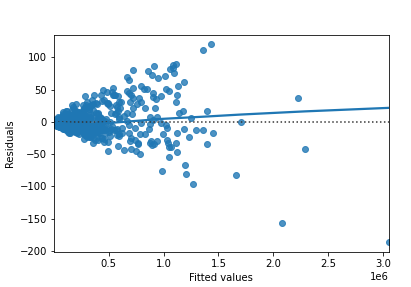

Transformed model (n_clicks ** 0.25 versus n_impressions ** 0.25):

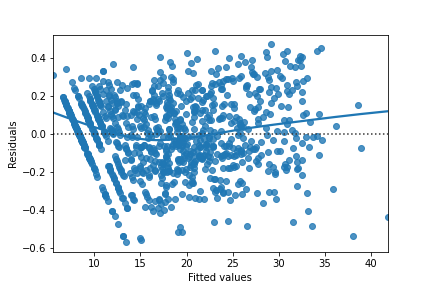

Look at the numbers on the y-axis scales and how well the trend lines follow the y = 0 line. Which statement is true?

> The residuals track the y = 0 line more closely in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data.

### 2.2. Q-Q plot of residuals

Here are normal Q-Q plots of the previous two models.

Original model (n_clicks versus n_impressions):

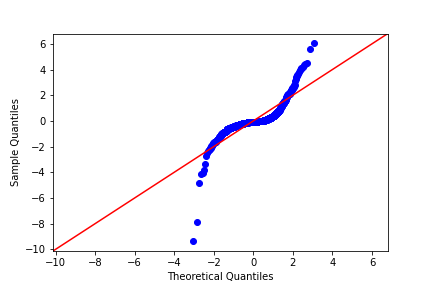

Transformed model (n_clicks ** 0.25 versus n_impressions ** 0.25):

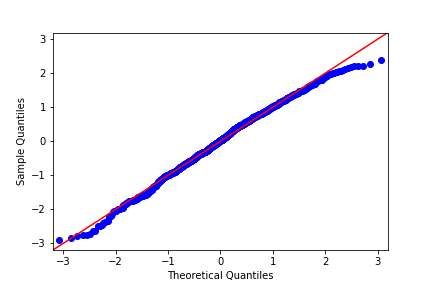

Look at how well the points track the "normality" line. Which statement is true?

> The residuals track the "normality" line more closely in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data.

### 2.3. Scale-location

Here are normal scale-location plots of the previous two models. That is, they show the size of residuals versus fitted values.

Original model (n_clicks versus n_impressions):

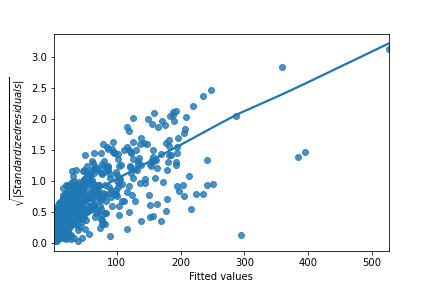

Transformed model (n_clicks ** 0.25 versus n_impressions ** 0.25):

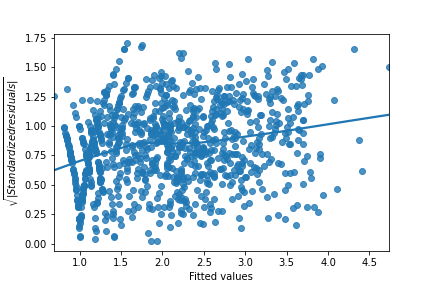

Look at the numbers on the y-axis and the slope of the trend line. Which statement is true?

> The size of the standardized residuals is more consistent in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data.

### 2.4. Drawing diagnostic plots

It's time for you to draw these diagnostic plots yourself using the Taiwan real estate dataset and the model of house prices versus number of convenience stores.

taiwan_real_estate is available as a pandas DataFrame and mdl_price_vs_conv is available.

In [13]:
taiwan_real_estate = pd.read_csv('../data/taiwan_real_estate2.csv')

In [14]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [15]:
# Initializing and fitting the model:
model = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate).fit()

In [16]:
model.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

- Create the residuals versus fitted values plot. Add a lowess argument to visualize the trend of the residuals.

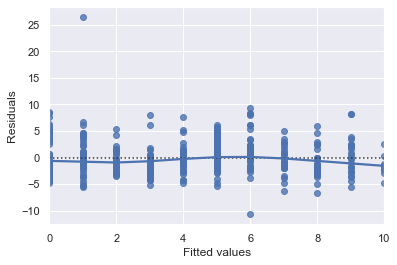

In [17]:
ax = sns.residplot(data=taiwan_real_estate, x='n_convenience', y='price_twd_msq', lowess=True)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals");

- Import qqplot() from statsmodels.api.
- Create the Q-Q plot of the residuals.

C:\Users\Moheb\Anaconda3\envs\data_playground\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


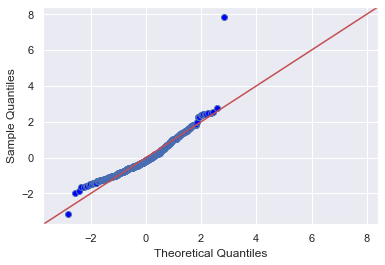

In [18]:
qqplot(data=model.resid, fit=True, line='45');

- Create the scale-location plot.

In [19]:
normalized_residuals = model.get_influence().resid_studentized_internal
sqr_abs_normalized_residuals = np.sqrt(np.abs(normalized_residuals))

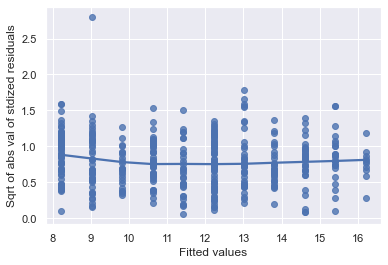

In [20]:
ax = sns.regplot(x=model.fittedvalues, y=sqr_abs_normalized_residuals, ci=None, lowess=True)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Sqrt of abs val of stdized residuals");

## 3. Outliers, leverage, and influence

### 3.1. Leverage

Leverage measures how unusual or extreme the explanatory variables are for each observation. Very roughly, high leverage means that the explanatory variable has values that are different from other points in the dataset. In the case of simple linear regression, where there is only one explanatory value, this typically means values with a very high or very low explanatory value.

Here, you'll look at highly leveraged values in the model of house price versus the square root of distance from the nearest MRT station in the Taiwan real estate dataset.

Guess which observations you think will have a high leverage, then move the slider to find out.

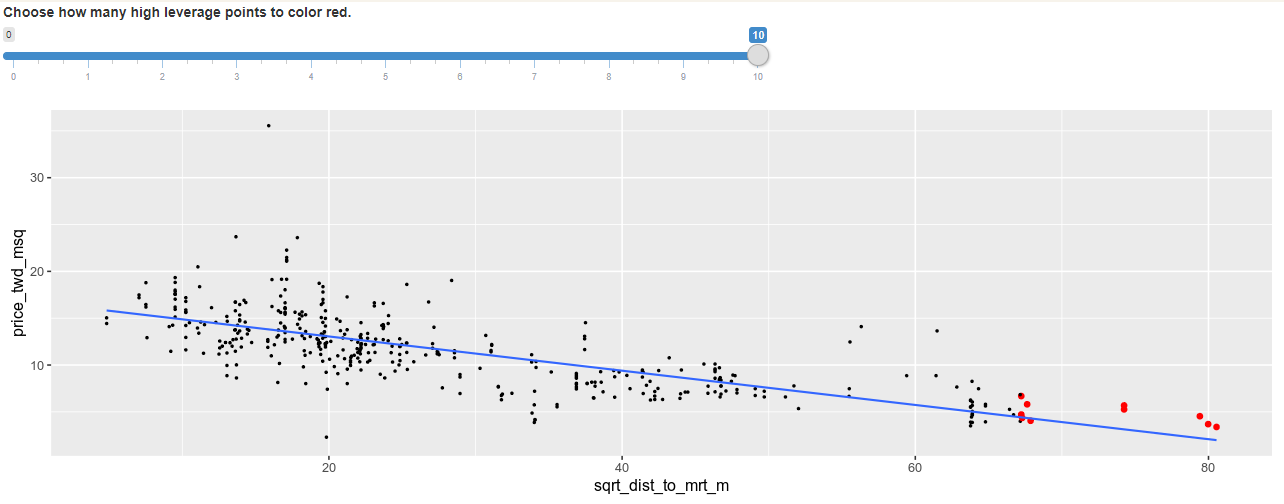

Which statement is true?

> Observations with a large distance to the nearest MRT station have the highest leverage, because most of the observations have a short distance, so long distances are more extreme.

### 3.2. Influence

Influence measures how much a model would change if each observation was left out of the model calculations, one at a time. That is, it measures how different the prediction line would look if you would run a linear regression on all data points except that point, compared to running a linear regression on the whole dataset.

The standard metric for influence is Cook's distance, which calculates influence based on the residual size and the leverage of the point.

You can see the same model as last time: house price versus the square root of distance from the nearest MRT station in the Taiwan real estate dataset.

Guess which observations you think will have a high influence, then move the slider to find out.

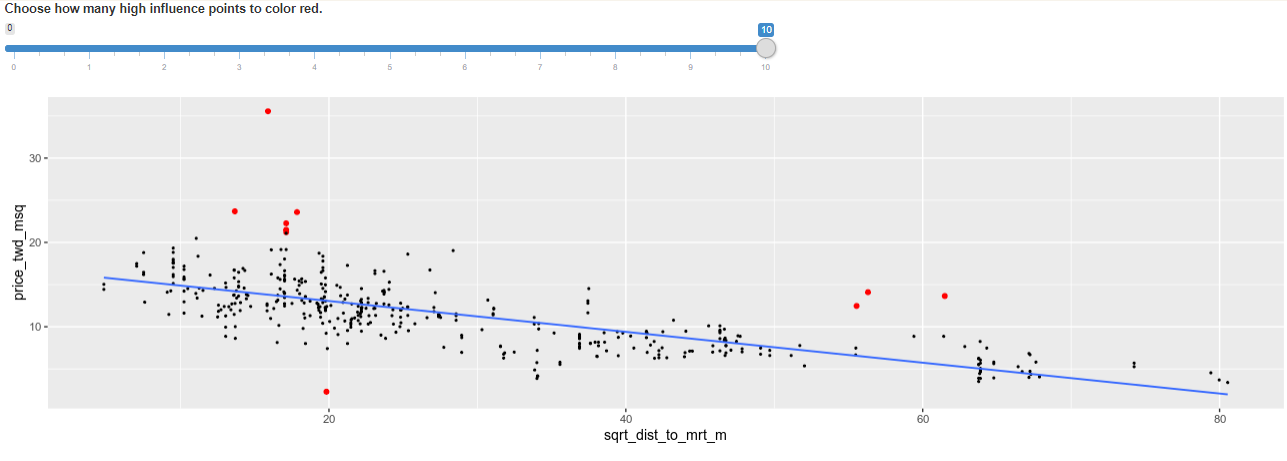

Which statement is true?

> Observations far away from the trend line have high influence, because they have large residuals and are far away from other observations.

### 3.3. Extracting leverage and influence

In the last few exercises, you explored which observations had the highest leverage and influence. Now you'll extract those values from the model.

mdl_price_vs_dist and taiwan_real_estate are available.

In [21]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [22]:
# Initializing and fitting the model:
model = ols('price_twd_msq ~ dist_to_mrt_m', data=taiwan_real_estate).fit()

- Get the summary frame from mdl_price_vs_dist and save as summary_info.

In [23]:
summary_info = model.get_influence().summary_frame()

In [24]:
summary_info.head()

,dfb_Intercept,dfb_dist_to_mrt_m,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.045802,0.028471,1.051794e-03,-0.729947,0.003932,-0.045865,-0.729532,-0.045839
1,-0.008087,0.004298,3.360963e-05,-0.141759,0.003334,-0.008199,-0.141590,-0.008189
2,0.027808,-0.011197,4.291555e-04,0.549988,0.002829,0.029297,0.549522,0.029272
3,0.065633,-0.026429,2.382744e-03,1.295938,0.002829,0.069033,1.297011,0.069090
4,0.000464,-0.000228,1.125574e-07,0.008446,0.003146,0.000474,0.008435,0.000474


- Add the hat_diag column of summary_info to taiwan_real_estate as the leverage column.
- Sort taiwan_real_estate by leverage in descending order and print the head.

In [25]:
taiwan_real_estate['leverage'] = summary_info['hat_diag']

In [26]:
taiwan_real_estate.sort_values(by='leverage', ascending=False).head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,leverage
347,6488.021,1,15 to 30,3.388805,0.046808
116,6396.283,1,30 to 45,3.691377,0.045313
249,6306.153,1,15 to 30,4.538578,0.043870
255,5512.038,1,30 to 45,5.264750,0.032221
8,5512.038,1,30 to 45,5.688351,0.032221


- Add the cooks_d column from summary_info to taiwan_real_estate as the cooks_dist column.
- Sort taiwan_real_estate by cooks_dist in descending order and print the head.

In [27]:
taiwan_real_estate['cooks_dist'] = summary_info['cooks_d']

In [28]:
taiwan_real_estate.sort_values(by='cooks_dist', ascending=False).head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,leverage,cooks_dist
270,252.5822,1,0 to 15,35.552194,0.003466,0.092948
249,6306.1530,1,15 to 30,4.538578,0.043870,0.052859
148,3780.5900,0,15 to 30,13.645991,0.013470,0.048675
116,6396.2830,1,30 to 45,3.691377,0.045313,0.040168
347,6488.0210,1,15 to 30,3.388805,0.046808,0.039480
